In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.rcParams["font.size"] = 16


from sklearn.model_selection import train_test_split

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import (
    ColumnTransformer,
    TransformedTargetRegressor,
    make_column_transformer,
)
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

1. After examining the two Kaggle datasets and their documentation, we chose the New York City Airbnb dataset due to its robust numerical features and alignment with our interest in regression.


2. We are working with the NYC Airbnb dataset from 2019, which includes various listing attributes such as host ID, neighborhood information, room type, and pricing details. Our goal is to predict the “reviews_per_month” feature to understand what influences listing popularity or engagement. The data contains both numerical features (e.g., price, availability) and categorical features (e.g., room type, neighborhood), making it a promising candidate for a regression task.

In [3]:
#3
bnb_dataset = pd.read_csv("data/AB_NYC_2019.csv")
bnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [ ]:
# Train-Test Split
train_df, test_df = train_test_split(bnb_dataset, test_size = 0.3, random_state = 123)

# Target variable (y)
y_train = train_df["reviews_per_month"]
y_test = test_df["reviews_per_month"]

# Input features (X)
X_train = train_df.drop(columns=["reviews_per_month"])
X_test = test_df.drop(columns=["reviews_per_month"])

print(train_df.shape)
print(test_df.shape)

(29337, 16)
(19558, 16)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

In [5]:
## Shouldn't we be using this instead? to check the entire training set instead of just X_train?
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 29337 entries, 17877 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29337 non-null  int64  
 1   name                            29328 non-null  object 
 2   host_id                         29337 non-null  int64  
 3   host_name                       29325 non-null  object 
 4   neighbourhood_group             29337 non-null  object 
 5   neighbourhood                   29337 non-null  object 
 6   latitude                        29337 non-null  float64
 7   longitude                       29337 non-null  float64
 8   room_type                       29337 non-null  object 
 9   price                           29337 non-null  int64  
 10  minimum_nights                  29337 non-null  int64  
 11  number_of_reviews               29337 non-null  int64  
 12  last_review                     2

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.933700e+04,2.933700e+04,29337.000000,29337.000000,29337.000000,29337.000000,29337.000000,23386.000000,29337.000000,29337.000000
mean,1.891988e+07,6.714579e+07,40.729013,-73.952217,150.939121,7.141971,23.354501,1.369867,7.003340,112.803627
std,1.102155e+07,7.835404e+07,0.054594,0.046091,228.224188,22.272110,44.692480,1.706732,32.511623,131.544488
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.350729e+06,7.740184e+06,40.690090,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.951751e+07,3.071907e+07,40.723140,-73.955530,107.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.916531e+07,1.064429e+08,40.763280,-73.936430,175.000000,5.000000,23.000000,2.010000,2.000000,227.000000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



<b> 2. Summary Statistics:</b> 

<b> Price Distribution </b> (Mean price $151.53):

The mean price of listings is $151.53, however the the standard deviation is high ($236.63), indicating that prices vary widely. The median price (50th percentile) is $106, which suggests that most listings are priced lower than the mean, confirming the presence of outliers like luxury listings (~$10,000).

<b> Reviews Per Month Distribution </b> (Mean per month 1.37):

The mean number of reviews per month is 1.37, but the standard deviation is high 1.70, meaning some listings receive significantly more reviews than others. The minimum value is 0 which is likely indicating inactive or new listings, while the maximum is 58.5, showing that some listings are exceptionally popular.


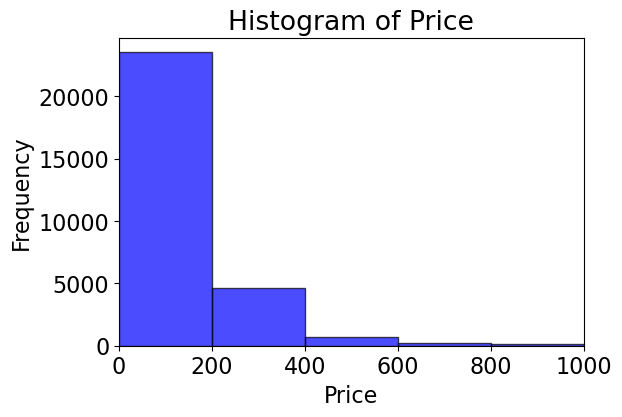

In [6]:
plt.figure(figsize=(6,4))
plt.hist(X_train["price"], bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price")
plt.xlim(0, 1000)  # Limiting to ignore outliers and better visualization
plt.show()

<b>The histogram shows that most Airbnb listings are priced below $200, with a sharp drop in frequency as prices increase, further on the distribution is highly skewed to the right, meaning a small number of listings have very high prices (luxury listings) which suggests that price normalization will be necessary for regression to prevent the extreme values from influencing the model. </b>

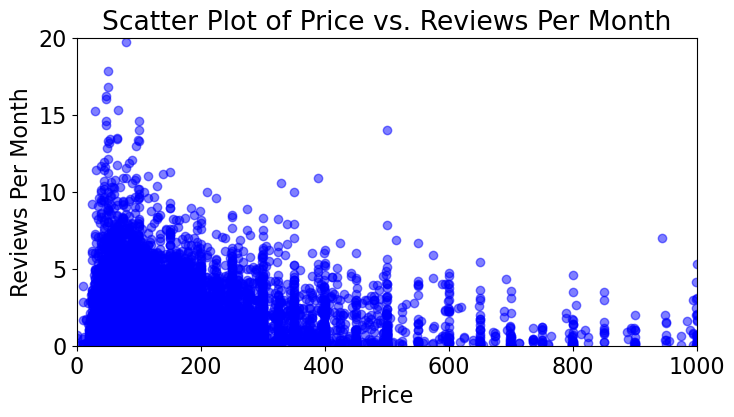

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4)) 
plt.scatter(X_train["price"], y_train, alpha=0.5, color='blue')
plt.xlabel("Price")
plt.ylabel("Reviews Per Month")
plt.title("Scatter Plot of Price vs. Reviews Per Month")
plt.xlim(0, 1000)  # For extreme price outliers
plt.ylim(0, 20) # For better visualization because the default scale makes all the point blend together.
plt.show()

<b> The scatter plot indicates an inverse relationship between price and reviews per month where cheaper listings generally receive more reviews. Listings priced under $200 tend to have higher review activity, whereas expensive listings receive fewer reviews per month suggesting that price is a significant factor affecting a listing's popularity, because affordable listings attract more guests, leading to more frequent reviews. </b>

<b> 3. Initial Observation </b>

The exploratory data analysis reveals that price distribution is highly skewed, with most Airbnb listings priced below $200 but a few luxury listings reaching up to $10,000 and leading to potential outliers. The histogram of `price` confirms this right-skewed trend, suggesting that normalization will be needed for better regression performance. The scatter plot of `reviews_per_month` vs. `price` shows an inverse relationship, where cheaper listings receive more reviews, indicating that affordability plays a major role in listing popularity. Additionally, some listings have zero reviews, suggesting inactive or new properties, while extreme values in both `price` and `reviews_per_month` highlight the need for data cleaning and feature engineering. To improve model accuracy, factors like location, availability, and room type should be further analyzed, as they may significantly impact review frequency.

<b> 4. Appropriate Metrics </b>

Since this is a regression problem predicting `reviews_per_month`, we need metrics that evaluate how well the model predicts continuous values. <br>
The most appropriate metrics are:
- <b>$R^2$ Score (Coefficient of Determination)</b> – Indicates how well the model explains the variance in reviews_per_month and useful as a supplementary metric but should be interpreted cautiously due to skewed data and alongside RMSE/MAE.
- <b> Mean Absolute Error (MAE) </b> – Measures the average absolute difference between predictions and actual values, making it easy to interpret. It is less sensitive to extreme values than RMSE, providing a balanced accuracy measure.
- <b> Root Mean Squared Error (RMSE) </b> – Primary metric for model evaluation as it penalizes larger errors, making it useful for handling outliers in reviews_per_month. Also provides an error measurement in the same unit as the target variable, making it interpretable.
- <b> Mean Squared Error (MSE) </b> - Useful in early stages to assess raw model performance between models, can provide insights but less interpretable due to squared error units.
- <b> Mean Absolute Percentage Error (MAPE) </b> - Can be useful before transformations to understand relative errors across different listing types. May become unreliable due to zero values in reviews_per_month.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<b> Feature 1:</b> `price_per_night`

Since some listings have very high `minimum_nights` values, directly using price as a feature does not capture how affordable a listing is <b>per night</b>. To address this, we create a new feature: `price_per_night`, which gives a clearer representation of the actual per night cost.

<b> Why do this? </b> <br>

We do this because it gives us a more realistic cost measure compared to just using price. Further on it avoids distortion from long-term stays, which makes a listing appear expensive when it is not and prepares the dataset for regression modeling by ensuring price comparisons are fair across listings.

In [8]:
X_train["price_per_night"] = X_train["price"] / X_train["minimum_nights"]
X_test["price_per_night"] = X_test["price"] / X_test["minimum_nights"]

X_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,price_per_night
17877,14010200,"Scandinavean design in Crown Heights, BK",1683437,Boram,Brooklyn,Crown Heights,40.66477,-73.95060,Entire home/apt,89,5,9,2018-05-28,1,0,17.8
14638,11563821,Private bedroom located in the heart of Chelsea,10307134,Anna,Manhattan,Chelsea,40.74118,-74.00012,Private room,110,1,48,2019-06-16,2,67,110.0
7479,5579629,Lovely sunlit room in Brooklyn,329917,Clémentine,Brooklyn,Greenpoint,40.72905,-73.95755,Private room,53,2,5,2016-10-21,1,0,26.5
47058,35575853,"Great view, 1 BR right next to Central Park!",35965489,Meygan,Manhattan,East Harlem,40.79755,-73.94797,Private room,100,2,0,NaN,1,7,50.0
9769,7509362,Great BIG Upper West Side Apartment,29156329,Andrew,Manhattan,Upper West Side,40.80120,-73.96382,Private room,87,3,9,2018-09-19,1,0,29.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [9]:
# Features to drop 
# They do not provide any value for regression
# names have other feature values include and are irrelative
# ids are irrelative for regression since they represent identification of a person, host.

#UNSURE ABOUT THIS - I agree with the above

# last_review is irrelative because the lastest review you get, logically does not make sense when predicting reviews per month (i think) (HAVE TO ASK)
# last_review will be NaN if there is no review, so it is not a good feature to use for prediction cos we're anyway keeping number_of_reviews (i think)

## Drop features (irrelevant for prediction) 
drop_features = ["id", "name", "host_id", "host_name", "last_review"]

# Numerical features 
numerical_features = ["price", "price_per_night", "minimum_nights", "number_of_reviews", "availability_365", "calculated_host_listings_count"]

# Categorical features
categorical_features = ["room_type", "neighbourhood_group", "neighbourhood"]

# Pass Through features
passthrough_features = ["latitude", "longitude"]

In [10]:
# Check for missing values in X_train
print(X_train[categorical_features].isnull().sum())
print(X_train[numerical_features].isnull().sum())

room_type              0
neighbourhood_group    0
neighbourhood          0
dtype: int64
price                             0
price_per_night                   0
minimum_nights                    0
number_of_reviews                 0
availability_365                  0
calculated_host_listings_count    0
dtype: int64


In [11]:
# Check for missing values in y_train
print(y_train.isnull().sum())

5951


Hence, we can see that `X_train` has no missing values but `y_train` has 6990 missing values. So, we impute `y_train` with the median of `reviews_per_month` since the mean would be influenced by outliers.

In [12]:
y_train = y_train.fillna(y_train.median())
print(y_train.isnull().sum())

0


For numerical features, we will use `StandardScaler` to standardise our values. <br>
For categorical features, we will use `OneHotEncoder` since there is no inherent order to our categorical values.

In [13]:
numeric_transformer = make_pipeline(
    StandardScaler())

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
)

In [14]:
preprocessor = make_column_transformer(
    (numeric_transformer, numerical_features),
    (categorical_transformer, categorical_features),
    ("passthrough", passthrough_features),
    ("drop", drop_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['price', 'price_per_night', 'minimum_nights',
                                  'number_of_reviews', 'availability_365',
                                  'calculated_host_listings_count']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['room_type', 'neighbourhood_group',
                                  'neighbourhood']),
                                ('passthrough', 'passthrough',
                                 ['latitude', 'longitude']),
                                ('drop', 'drop',
                                 ['id', 'name', 'host_id', 'host_name',
                                  'last_review'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [15]:
# Create dummy regressor and pipeline for CV
dummy_regressor = DummyRegressor(strategy="mean")
dummy_pipe = make_pipeline(preprocessor, dummy_regressor)

# Cross validation
pd.DataFrame(cross_validate(dummy_pipe, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.047799,0.009788,-0.000158,0.0
1,0.038321,0.007844,-0.000462,0.0
2,0.033347,0.007546,-0.000027,0.0
3,0.033608,0.006813,-0.000591,0.0
4,0.033995,0.007210,-0.000363,0.0
5,0.034261,0.008227,-0.000066,0.0
6,0.033989,0.007047,-0.000019,0.0
7,0.032985,0.007306,-0.000005,0.0
8,0.033415,0.007483,-0.000138,0.0
9,0.032729,0.007234,-0.002528,0.0


<b> Interpretation of results </b>

The train_score ($R^2$) is 0. This indicates, on average, that the DummyRegressor predicts the training set’s own mean about as well as using the mean itself—so it “explains” none of the variance. This is typical for a model that always predicts a constant value.

The test_score is around −0.0002. This means the model is doing slightly worse than if it predicted the test set’s mean for those folds. In other words, the DummyRegressor’s constant prediction (the training fold’s mean) doesn’t align perfectly with the test fold’s actual average.

Any real model should ideally produce a higher $R^2$ (closer to 1) than this dummy baseline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Let's use Ridge regression as our first linear model.

In [16]:
# Create Ridge pipeline
lr_regressor = Ridge()
lr_pipe = make_pipeline(preprocessor, lr_regressor)

# Ridge CV
pd.DataFrame(cross_validate(lr_pipe, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.095276,0.007891,0.391841,0.367244
1,0.089144,0.007318,0.363735,0.370466
2,0.089194,0.007654,0.381133,0.368691
3,0.088283,0.007141,0.269752,0.385493
4,0.088448,0.007376,0.342647,0.372683
5,0.088699,0.007802,0.396372,0.366925
6,0.092082,0.007133,0.341042,0.372731
7,0.092753,0.007434,0.355615,0.371024
8,0.159601,0.008571,0.400564,0.366431
9,0.101676,0.007775,0.372937,0.369501


We can see that this model is performing quite poorly as there is quite a bit of variance in `test_score`. Fold 4 is especially low. <br>

Let's attempt to tune the `alpha` hyperparameter to see if we can improve our scores.

In [17]:
# Parameter grid for alpha
param_grid = {"ridge__alpha": 10.0 ** np.arange(-5, 5, 1)}

pipe_ridge = make_pipeline(preprocessor, Ridge())

search = GridSearchCV(pipe_ridge, param_grid, return_train_score=True, n_jobs=-1)
search.fit(X_train, y_train)

train_scores = search.cv_results_["mean_train_score"]
cv_scores = search.cv_results_["mean_test_score"]

Text(0, 0.5, 'score')

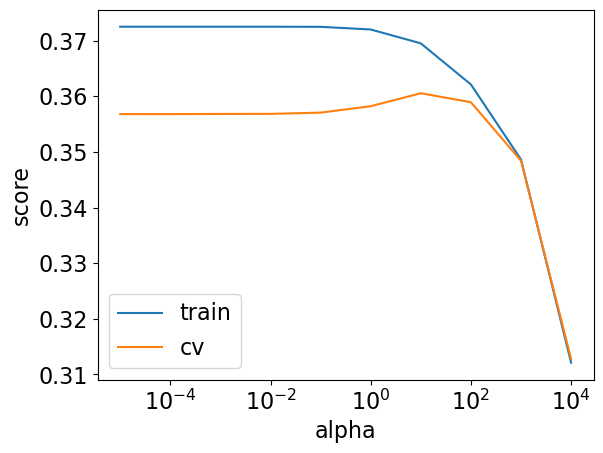

In [18]:
# Plot of cv and train scores against alpha
plt.semilogx(param_grid["ridge__alpha"], train_scores.tolist(), label="train")
plt.semilogx(param_grid["ridge__alpha"], cv_scores.tolist(), label="cv")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("score")

In [19]:
# Summarising CV results with standard deviations
cv_results = pd.DataFrame({
    "alpha": search.cv_results_["param_ridge__alpha"],
    "mean_train_score": search.cv_results_["mean_train_score"],
    "std_train_score": search.cv_results_["std_train_score"],
    "mean_test_score": search.cv_results_["mean_test_score"],
    "std_test_score": search.cv_results_["std_test_score"],
})

# Sort by alpha
cv_results.sort_values(by="alpha", inplace=True)
cv_results

,alpha,mean_train_score,std_train_score,mean_test_score,std_test_score
0,0.00001,0.372492,0.007201,0.356792,0.025996
1,0.00010,0.372492,0.007201,0.356788,0.025995
2,0.00100,0.372492,0.007200,0.356817,0.026014
3,0.01000,0.372491,0.007200,0.356828,0.026027
4,0.10000,0.372474,0.007201,0.357052,0.026072
5,1.00000,0.371997,0.007211,0.358205,0.026297
6,10.00000,0.369502,0.007225,0.360537,0.026518
7,100.00000,0.362116,0.007260,0.358922,0.026552
8,1000.00000,0.348628,0.007117,0.348403,0.025739
9,10000.00000,0.312107,0.006236,0.312790,0.022553


In [20]:
# Identify the best alpha and its score and SD
best_idx = search.best_index_

best_alpha = search.best_params_["ridge__alpha"]
best_mean_test_score = search.cv_results_["mean_test_score"][best_idx]
best_std_test_score = search.cv_results_["std_test_score"][best_idx]

print(f"Best alpha: {best_alpha}")
print(f"CV R^2 (mean ± std): {best_mean_test_score:.4f} ± {best_std_test_score:.4f}")

Best alpha: 10.0
CV R^2 (mean ± std): 0.3605 ± 0.0265


It appears that `alpha` = 10.0 is the best value, achieving the highest CV $R^2$ of 36.55%, with a standard deviation of 0.0320. While this is much better than the `DummyRegressor` baseline, it is still a very low score and we would want to improve it.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

We will now try fitting various other models to determine if we can beat the Ridge model found above. <br>

First, let's create a dictionary to store our results for the different models.

In [21]:
results_dict = {}

Now we can write a function to return the mean and std of cross validation for each model

In [22]:

# Citation: CPSC 330 Lecture 5
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model, X_train,  y_train

    Returns
    ----------
    pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

Before we start with the new models, let's add the existing dummy and Ridge models to this dictionary.

In [23]:
# For dummy
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy_pipe, X_train, y_train, return_train_score=True
)

# For Ridge
results_dict["Ridge"] = mean_std_cross_val_scores(
    lr_pipe, X_train, y_train, return_train_score=True
)

/var/folders/h7/_wcrqxc55wgb4lvpvdb4gdhr0000gn/T/ipykernel_11606/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
/var/folders/h7/_wcrqxc55wgb4lvpvdb4gdhr0000gn/T/ipykernel_11606/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [24]:
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.031 (+/- 0.001),0.011 (+/- 0.000),-0.000 (+/- 0.000),0.000 (+/- 0.000)
Ridge,0.082 (+/- 0.002),0.011 (+/- 0.000),0.358 (+/- 0.029),0.372 (+/- 0.008)


Now we can continue adding our new models!

#### Model 1: KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

pipe = make_pipeline(preprocessor, KNeighborsRegressor())

results_dict["KNeighborsRegressor"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

/var/folders/h7/_wcrqxc55wgb4lvpvdb4gdhr0000gn/T/ipykernel_11606/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
dummy,0.031 (+/- 0.001),0.011 (+/- 0.000),-0.000 (+/- 0.000),0.000 (+/- 0.000)
Ridge,0.082 (+/- 0.002),0.011 (+/- 0.000),0.358 (+/- 0.029),0.372 (+/- 0.008)
KNeighborsRegressor,0.051 (+/- 0.021),6.647 (+/- 0.288),0.378 (+/- 0.035),0.591 (+/- 0.007)


We can see that `KNeighborsRegressor` is giving a much higher validation score than the other two, which is a great start. However, it is still overfitting since there is a large variance between `train_score` and `test_score`.

#### Model 2: Random Forest

First, let's determine how a single `DecisionTreeRegressor` performs on our data.

In [26]:
from sklearn.tree import DecisionTreeRegressor

pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
pd.DataFrame(mean_std_cross_val_scores(
    pipe_dt, X_train, y_train, return_train_score=True
))

/var/folders/h7/_wcrqxc55wgb4lvpvdb4gdhr0000gn/T/ipykernel_11606/2765916500.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,0
fit_time,2.041 (+/- 0.464)
score_time,0.016 (+/- 0.004)
test_score,0.134 (+/- 0.071)
train_score,1.000 (+/- 0.000)


Since the `train_score` is perfect but the `test_score` is significantly lower (18.1%), this single decision tree is grossly overfitting. To rectify this, we can use a `RandomForestRegressor`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))

results_dict["RandomForestRegressor"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

Using the `RandomForestRegressor` has given us a much higher `train_score` of 93.7% but is still significantly overfitting since the `test_score` is only 55.7%.

#### Model 3: Gradient Boosted Trees

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

pipe = make_pipeline(preprocessor, GradientBoostingRegressor(random_state=123))

results_dict["GradientBoostingRegressor"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

Since the `GradientBoostingRegressor` has solved the problem of overfitting but now has much lower `train_score` and `test_score`, we can try using another gradient boosting model like `XGBRegressor`.

In [ ]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=123, objective='reg:squarederror')
xgb_pipe = make_pipeline(preprocessor, xgb_reg)

results_dict["XGBRegressor"] = mean_std_cross_val_scores(
    xgb_pipe, X_train, y_train, return_train_score=True
)
pd.DataFrame(results_dict).T

#### Summary Of Results

We evaluated six models on our dataset: `Dummy`, `Ridge`, `KNeighborsRegressor`, `RandomForestRegressor`, `GradientBoostingRegressor`, and `XGBRegressor`. The `Dummy` model serves as a baseline, always predicting the mean and scoring near 0 for both training and test $R^2$. `Ridge`, our linear model, achieves a balanced performance with a training $R^2$ of about 37.4% and a test $R^2$ of 36.4%, indicating minimal overfitting. `KNeighborsRegressor` shows moderate overfitting, with its training $R^2$ (60.0%) notably higher than its test $R^2$ (39.3%), and it also has a longer score time (5.296 s) because of the distance computations at prediction.

Among the tree-based methods, `RandomForestRegressor` and `XGBRegressor` achieve the highest test $R^2$ scores (55.7% and 55.6%, respectively), outperforming `Ridge` on unseen data. However, they both display more overfitting, evidenced by higher training $R^2$ scores (93.7% for `RandomForest` and 73.0% for `XGB`). `GradientBoostingRegressor` also overfits (89.5% training vs. 50.5% test), though it remains faster to train than RandomForest. Overall, the tree-based models do beat the linear approach in predictive accuracy on the test set, but at the cost of longer training times and larger gaps between training and test performance.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

# Create a pipeline with:
#    - Preprocessing
#    - RFECV (which wraps Ridge in a recursive feature selection)

# RFECV will:
#   - Fit multiple times with different subsets of features
#   - Use an internal CV=5 by default (or you can change it)
#   - Score by R^2 (scoring="r2") unless you choose otherwise
#   - step=1 means eliminate one feature per iteration
rfecv_cv = RFECV(Ridge(random_state=123, max_iter=2000), cv=10)

# Pipeline
pipe_rfe = Pipeline([
    ("preprocessor", preprocessor),
    ("rfecv", rfecv_cv)
])

# Evaluate with an outer CV
scores = cross_val_score(pipe_rfe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
print(f"RFECV (Ridge) mean CV R^2: {scores.mean():.3f} ± {scores.std():.3f}")

# Fit once on the entire training set to inspect selected features
pipe_rfe.fit(X_train, y_train)

# Access the underlying RFECV object
rfecv_fitted = pipe_rfe.named_steps["rfecv"]

print("Number of features selected:", rfecv_fitted.n_features_)
print("Feature ranking (1 = selected):", rfecv_fitted.ranking_)

# Selected features
print("Selected features (True = kept):", rfecv_fitted.support_)

In [ ]:
# 1. Get the output feature names from the ColumnTransformer
feature_names = pipe_rfe.named_steps["preprocessor"].get_feature_names_out()

# 2. Identify which features are selected (True = kept, False = dropped)
selected_mask = rfecv_fitted.support_

# 3. Subset the feature names using the mask
selected_features = feature_names[selected_mask]

print("Number of features selected:", rfecv_fitted.n_features_)
print("Selected feature names:")
for feat in selected_features:
    print(feat)

**Summary of RFECV with Ridge**

After applying RFECV (with a Ridge estimator), the model selected **198** features out of the full transformed set. These include the original numeric features, as well as a large number of one-hot‐encoded **neighbourhood** columns and the passthrough columns. The mean cross-validation $R^2$ was **0.364 ± 0.032**, which is comparable to the baseline Ridge model on all features.

Because the performance is effectively the same and the feature set is still large (198 features), RFECV did not provide a meaningful improvement in this case. Hence, we will not be including the feature selection in our pipeline.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)